# Third Part

## Project 1 - Predicting Active Users on a Website

Time series analysis involves examining datasets that change over time to identify patterns, trends, and seasonal variations. This type of analysis is used in various fields such as finance, economics, and meteorology to forecast future values based on past data.

- Steps Involved in Time Series Analysis:
  
1- Data Collection: The first step is gathering the relevant data over a specified period. This data must be accurate and timely to ensure meaningful analysis.   `**done!**`

2- Visualisation: Once collected, the data is visualised using plots and graphs to understand its underlying patterns, trends, and any seasonal variations.  `**done!**`

3- Decomposition: The time series data is decomposed into its constituent components: trend, seasonality, and residual (noise). This helps in better understanding the individual elements affecting the data.  `**done!**`

4- Stationarity: For accurate modelling, the data must be stationary, meaning its statistical properties (mean, variance) do not change over time. Techniques such as differencing or transformation are used to achieve stationarity if needed.  `**ongoing**`

5- Model Selection: Various models can be applied to time series data, including ARIMA (AutoRegressive Integrated Moving Average), SARIMA (Seasonal ARIMA), and EMA (Exponential Moving Average). The choice of model depends on the characteristics of the data and the specific requirements of the analysis.

6- Parameter Estimation and Validation: Once a model is selected, its parameters need to be estimated and validated. This involves using techniques like cross-validation to ensure the model performs well on unseen data.

7- Forecasting: Using the validated model, future values of the time series are predicted. This is the core purpose of time series analysis and helps in making informed decisions based on the forecasts.

8- Evaluation and Updating: The accuracy of the forecasts is evaluated using metrics such as Mean Absolute Error (MAE) or Root Mean Square Error (RMSE). Based on the evaluation, the model might need to be updated or refined to improve its forecasting accuracy.

> In this project all these steps will be carried out. will be carried out.

> **In the third part, I intend to transform my time series into stationary. To achieve this, several transformation techniques will be applied.**

In [1]:
!pip install -q watermark

In [2]:
%reload_ext watermark
%watermark -a "Zelly Irigon"

Author: Zelly Irigon



In [3]:
# Imports

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# data analysis
import scipy
from scipy.stats import boxcox
import statsmodels
from statsmodels.tsa.stattools import adfuller # testing the stationarity

# warnings filter
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Graphs and tables formatting
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
# Graph Labels formatting
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'

## Load Data

In [6]:
# Loading data and define the date column as the index of the dataset (index_col = 0)
data = pd.read_csv('dataset.csv',
                   header = None,
                   index_col = 0,
                   names = ['active_users'])

In [7]:
data.head()

,active_users
2013-01,110
2013-02,121
2013-03,135
2013-04,127
2013-05,128


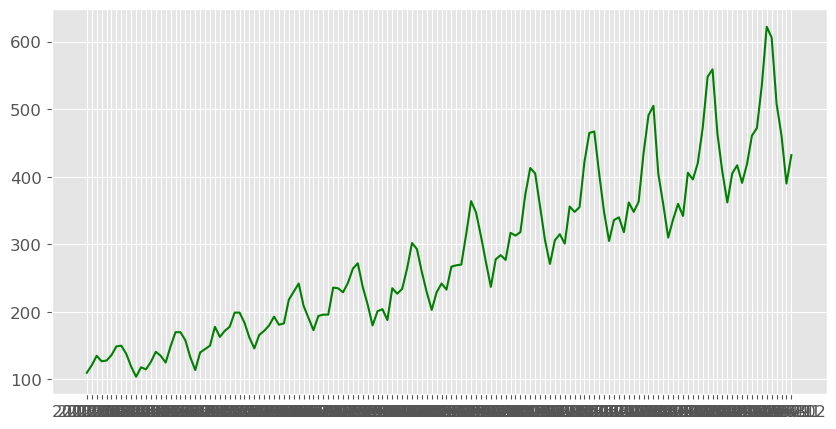

In [8]:
# Plot
plt.figure(figsize = (10 ,5))
plt.plot(data['active_users'], color = 'green')
plt.show()

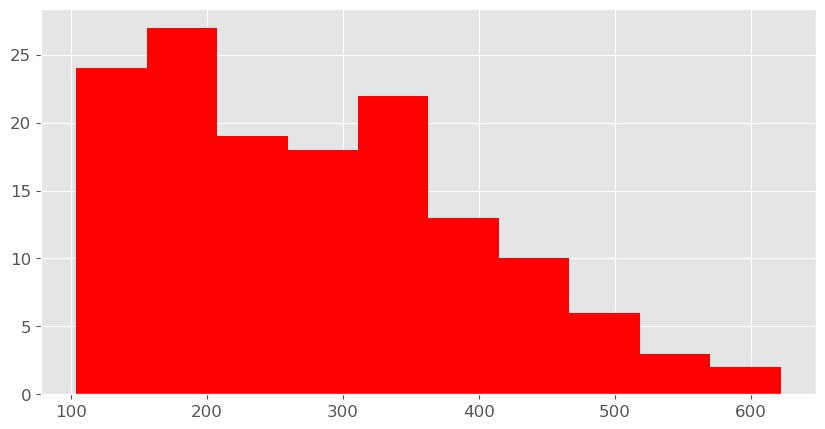

In [9]:
# Histogram
plt.figure(figsize = (10,5))
plt.hist(data['active_users'], color = 'red')
plt.show()

In [10]:
# Series mean calc (attention!! It isn't the rolling average!!!!)
data['active_users'].mean()

280.4166666666667

In [11]:
# Series standard deviation calc
data['active_users'].std()

119.82554335015902

The dataset is **non-stationary**, which means that the mean and variance of observations change over time. This complicates modelling using classical statistical methods like ARIMA, and more sophisticated machine learning methods such as neural networks.

Non-stationarity is caused by what appears to be a growing trend and a seasonal component.

Additionally, the amount of change or variance is increasing over time. This becomes evident when looking at the size of the seasonal component and noticing that the amplitude (from low to high) is increasing.

> **To convert the series into stationary, different transformation techniques will be applied.**

## Log Transformation

Time series can be linearised by taking the logarithm of the values. This is called a log transformation.

Log transformations are popular in time series data as they are effective in removing exponential variation.

It's important to note that this operation assumes values are positive and non-zero. It's common to transform observations by adding a fixed constant to ensure all input values meet this requirement. For example: transformed_series_y = log(constant + x).

In [12]:
# Log transformation applied using np.log(). Then the result is saved in a new column of the dataset
data['active_users_log'] = np.log(data['active_users'])
data.head()

,active_users,active_users_log
2013-01,110,4.700480
2013-02,121,4.795791
2013-03,135,4.905275
2013-04,127,4.844187
2013-05,128,4.852030


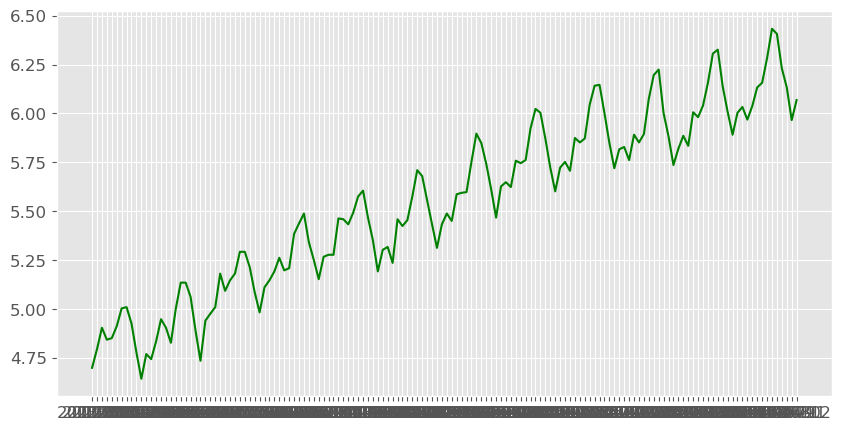

In [13]:
# Transformed series plot
plt.figure(figsize = (10, 5))
plt.plot(data['active_users_log'], color = 'green')
plt.show()

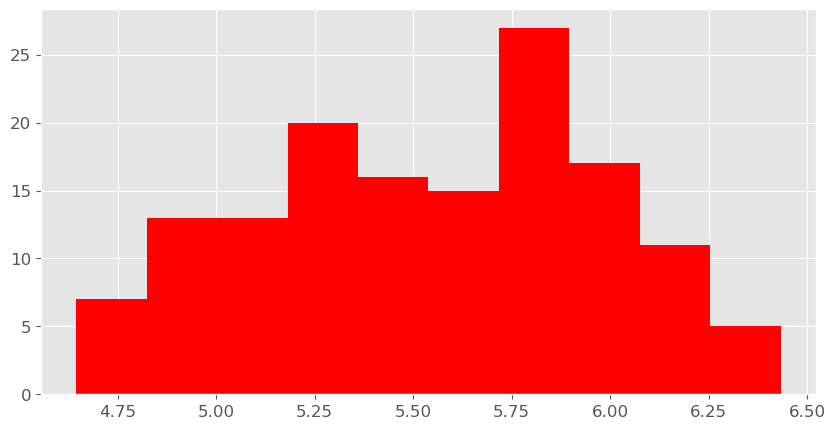

In [14]:
# Transformed series histogram
plt.figure(figsize = (10,5))
plt.hist(data['active_users_log'], color ='red')
plt.show()

**It is possible to notice a difference in the dispersion of the data, but it is still not enough to conclude that the series is stationary. For this, the stationarity function that I created in the second part of this project will be applied to test stationarity.**

In [15]:
# Function to test stationarity - Automating the Stationarity Test
def zelly_stationarity_test(series, window = 12, title = 'Rolling Average & Dickey-Fuller Test'):
    """
    Function to test the stationarity of the time series.

    Parameters:
    - series: pandas.Series. Time series to be tested.
    - window: int. Window to calculate rolling statistics.
    - title: str. Title for the graphs.
    """
    # Calculating the rolling average
    rolmean = series.rolling(window = window).mean()
    rolstd = series.rolling(window = window).std()

    # Plot Rolling Statistics
    plt.figure(figsize = (14,6))
    plt.plot(series, color = 'blue', label = 'Original')
    plt.plot(rolmean, color = 'red', label = 'Rolling Average')
    plt.plot(rolstd, color ='black', label = 'Rolling Standard Deviation')
    plt.legend(loc = 'best')
    plt.title(title)
    plt.show(block = False)

    # Dickey_Fuller Test
    print('\nResult Dickey-Fuller Test: ')
    dftest = adfuller(series, autolag = 'AIC') #adfuller creates vary models using the AIC metric
    dfoutput = pd.Series(dftest[0:4], index =['Test Statistic',
                                              'p-Value',
                                              'Lags Number Considered',
                                              'Observations Number Used'])
    for key,value in dftest[4].items():
        dfoutput['Critic Value (%s)' % key] = value

    print(dfoutput)

    # Conclusion based in the p-value
    if dfoutput['p-Value'] > 0.05:
        print('\nConclusion:\nThe p-value is greater than 0.05, therefore, we do not have evidence to reject the null hypothesis.\nThis series is probably not stationary.')
    else:
        print('\nConclusion:\nThe p-value is less than 0.05, therefore, we have evidence to reject the null hypothesis.\nThis series is probably stationary.')
              

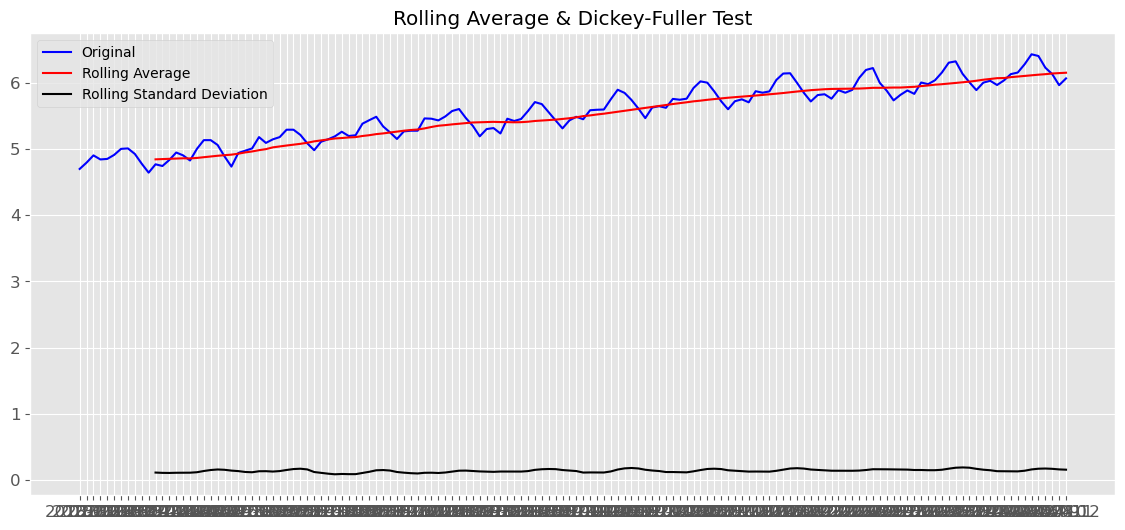


Result Dickey-Fuller Test: 
Test Statistic               -1.682091
p-Value                       0.440363
Lags Number Considered       13.000000
Observations Number Used    130.000000
Critic Value (1%)            -3.481682
Critic Value (5%)            -2.884042
Critic Value (10%)           -2.578770
dtype: float64

Conclusion:
The p-value is greater than 0.05, therefore, we do not have evidence to reject the null hypothesis.
This series is probably not stationary.


In [16]:
# Executing the function
zelly_stationarity_test(data['active_users_log'])

## Square Root Transformation  - Second Transform Technique applied for my case

A time series that exhibits a quadratic growth trend can be linearised by calculating its square root.

It's possible that the dataset shows quadratic growth. If so, one might expect that a square root transformation, aimed at reducing the growth trend, would linearise it and alter the distribution of observations to potentially become nearly Gaussian.

The example below performs a square root transformation of the dataset and plots the results.

In [17]:
# Using np.sqrt()
data_sqrt = np.sqrt(data['active_users'])

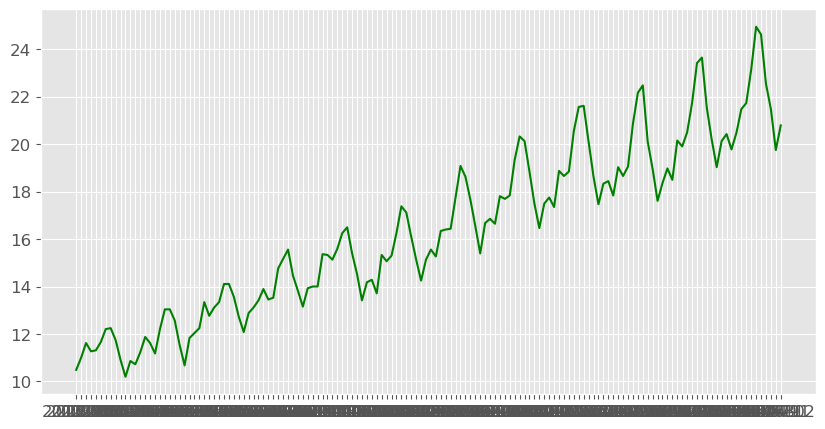

In [18]:
# Line chart
plt.figure(figsize = (10, 5))
plt.plot(data_sqrt, color ='green')
plt.show()

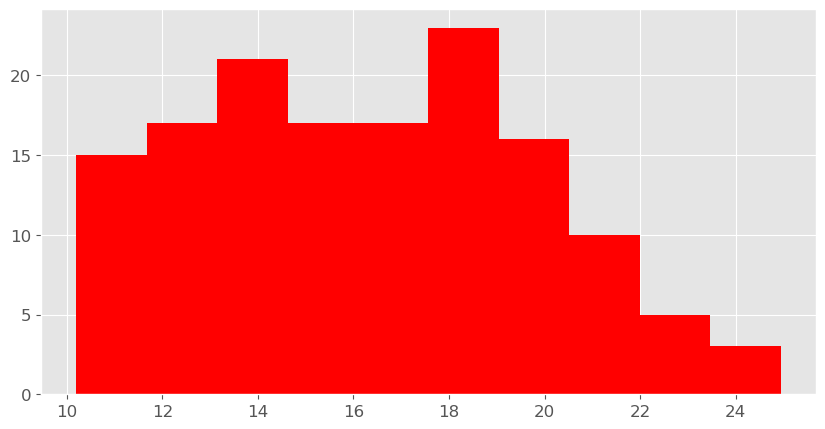

In [19]:
# Histogram
plt.figure(figsize = (10 ,5))
plt.hist(data_sqrt, color = 'red')
plt.show()

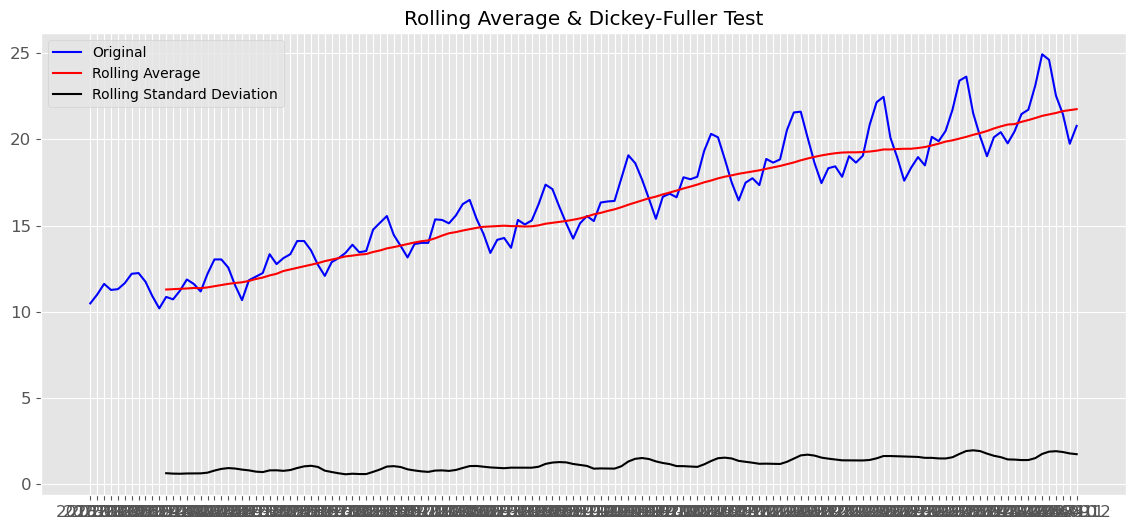


Result Dickey-Fuller Test: 
Test Statistic               -0.335165
p-Value                       0.920374
Lags Number Considered       13.000000
Observations Number Used    130.000000
Critic Value (1%)            -3.481682
Critic Value (5%)            -2.884042
Critic Value (10%)           -2.578770
dtype: float64

Conclusion:
The p-value is greater than 0.05, therefore, we do not have evidence to reject the null hypothesis.
This series is probably not stationary.


In [20]:
# Testing Stationarity Function
zelly_stationarity_test(data_sqrt)

Analysis:
* It's possible to observe that the trend has been reduced, but not removed.
* The line graph still shows increasing variation from cycle to cycle. And the histogram still displays a long tail to the right of the distribution, suggesting an exponential or long-tailed distribution.

## Box-Cox Transformation - Third Transform Technique applied for my case

The square root transformation and the logarithm transformation belong to a class of transformations called power transformations.

The Box-Cox transformation is a configurable method for transforming data that supports square root and logarithm transformations, as well as a set of related transformations.

Moreover, it can be configured to automatically evaluate a set of transformations and select the best fit. The resulting series may become more linear, and the resulting distribution may become more Gaussian or uniform, depending on the process that generated it.

The scipy.stats library provides an implementation of the Box-Cox transformation. The boxcox() function uses an argument called lambda, which controls the type of transformation to be performed.

Below are some common values for lambda:

* lambda = -1.0 is a reciprocal transformation.
* lambda = -0.5 is a reciprocal square root transformation.
* lambda = 0.0 is a logarithm transformation.
* lambda = 0.5 is a square root transformation.
* lambda = 1.0 is no transformation.

In [21]:
# Box-Cox Transformation
data['active_users_box'], lam_value = boxcox(data['active_users'])
print('Ideal Lambda Value: %f' % lam_value)
data.head()

Ideal Lambda Value: 0.141909


,active_users,active_users_log,active_users_box
2013-01,110,4.700480,6.683588
2013-02,121,4.795791,6.870558
2013-03,135,4.905275,7.088476
2013-04,127,4.844187,6.966469
2013-05,128,4.852030,6.982075


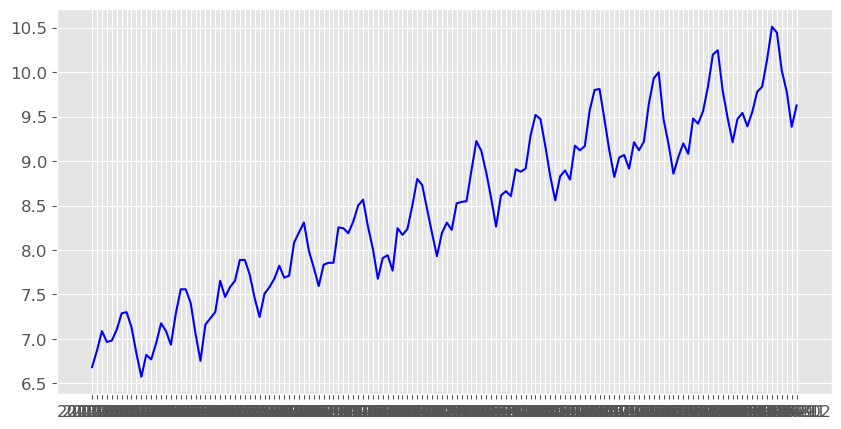

In [22]:
# Plot of the transformed series
plt.figure(figsize = (10, 5))
plt.plot(data['active_users_box'], color = 'blue')
plt.show()

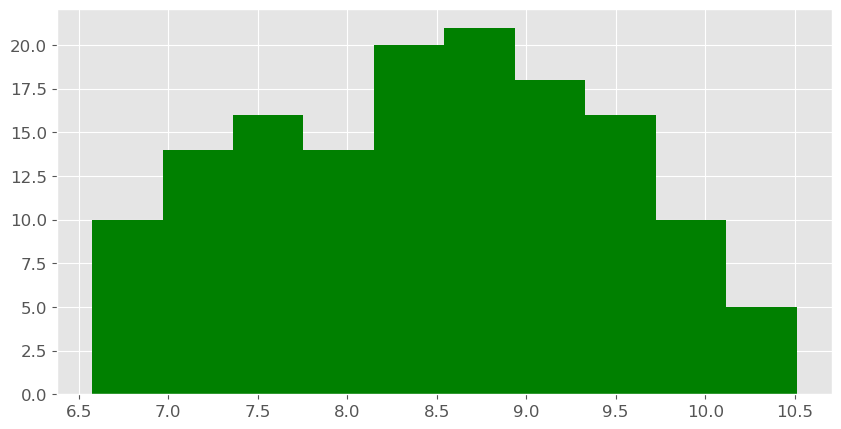

In [23]:
# Histogram of the transformed series
plt.figure(figsize = (10,5))
plt.hist(data['active_users_box'], color = 'green')
plt.show()

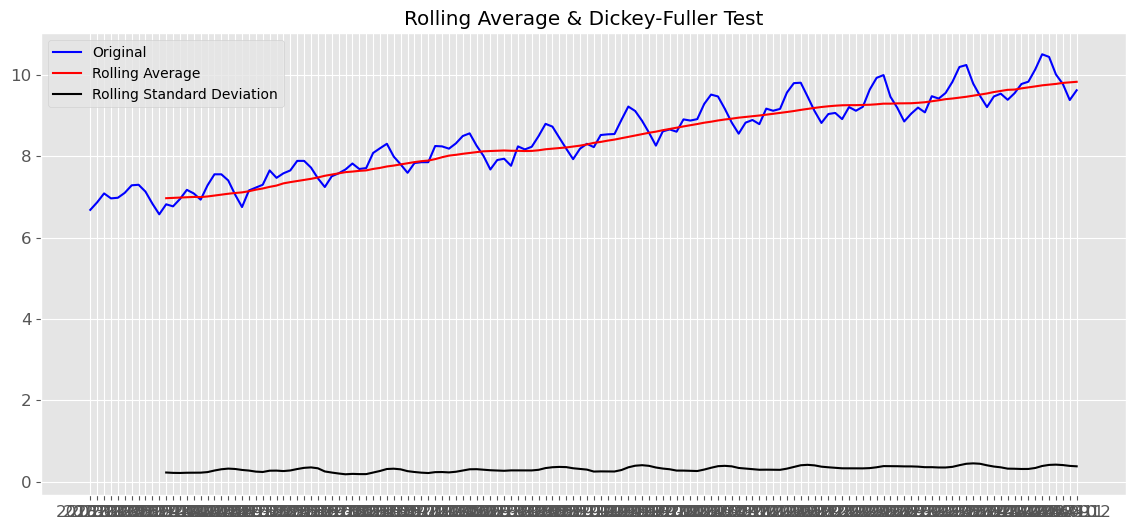


Result Dickey-Fuller Test: 
Test Statistic               -1.313294
p-Value                       0.623069
Lags Number Considered       13.000000
Observations Number Used    130.000000
Critic Value (1%)            -3.481682
Critic Value (5%)            -2.884042
Critic Value (10%)           -2.578770
dtype: float64

Conclusion:
The p-value is greater than 0.05, therefore, we do not have evidence to reject the null hypothesis.
This series is probably not stationary.


In [24]:
# Appling the Stationary test function
zelly_stationarity_test(data['active_users_box'])

Analysis:

* Running the example generated a lambda value of 0.918130.

* It can be observed that this is very close to a lambda value of 1.0, resulting in no transformation.

None of the previous techniques yielded results to make the series stationary. Therefore, more advanced techniques will need to be applied...

In [26]:
m.rcParams['figure.figsize'] = 18, 8
plt.style.use('fivethirtyeight')

## Smoothing Using Simple Moving Average (SMA) - 
**Purpose:**

Smoothing is a technique used to remove noise from a time series and highlight its important features, such as the underlying trend and seasonality. Making a time series stationary means making its statistical properties, such as mean and variance, constant over time. One common method to achieve this is through smoothing, specifically using a simple moving average.

**Simple Moving Average (SMA)**

A simple moving average is a method that calculates the average of a subset of data points over a specified period, which is known as the window size. This average is then used as the value for the central point in the subset, effectively smoothing out short-term fluctuations.

**How SMA Works:**

1- **Choose a Window Size:**
The window size (k) is the number of consecutive data points considered for calculating the average. For example, if k = 3, the moving average at each point is calculated based on the current point and the previous two points.

2- **Calculate the Moving Average:**
For each point in the time series, calculate the average of the values within the window.

3- **Shift the Window:**
Move the window one point forward and repeat the calculation until you reach the end of the series.

# Will be continued soon..